In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the big dataset (Diabetes_BigDataSet.csv)
bigdata_df = pd.read_csv('D:\\ai\\diabetes_data.csv')

# Display the first few rows to understand the data structure
bigdata_df.head()


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


Missing values in each column:
 Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64


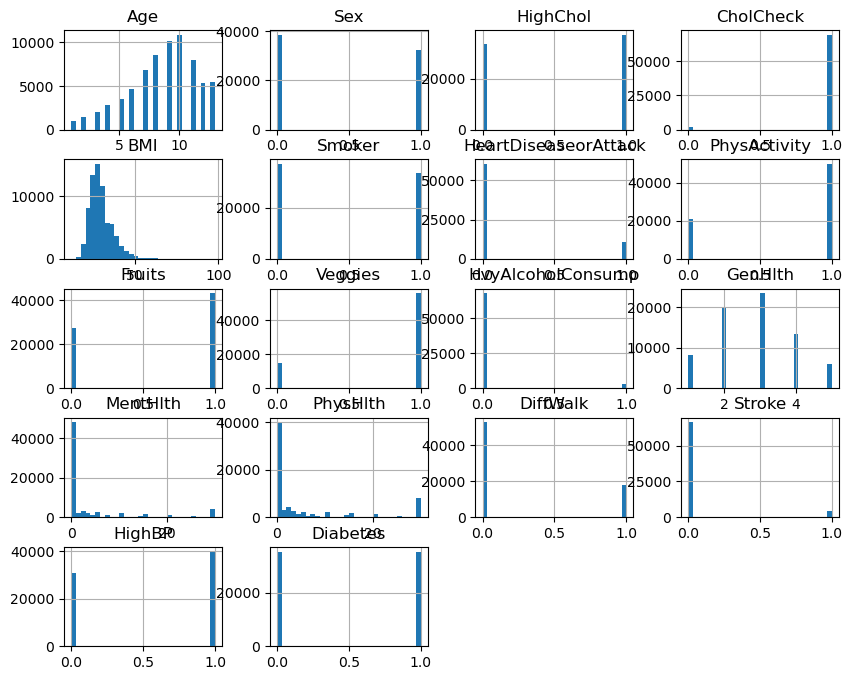

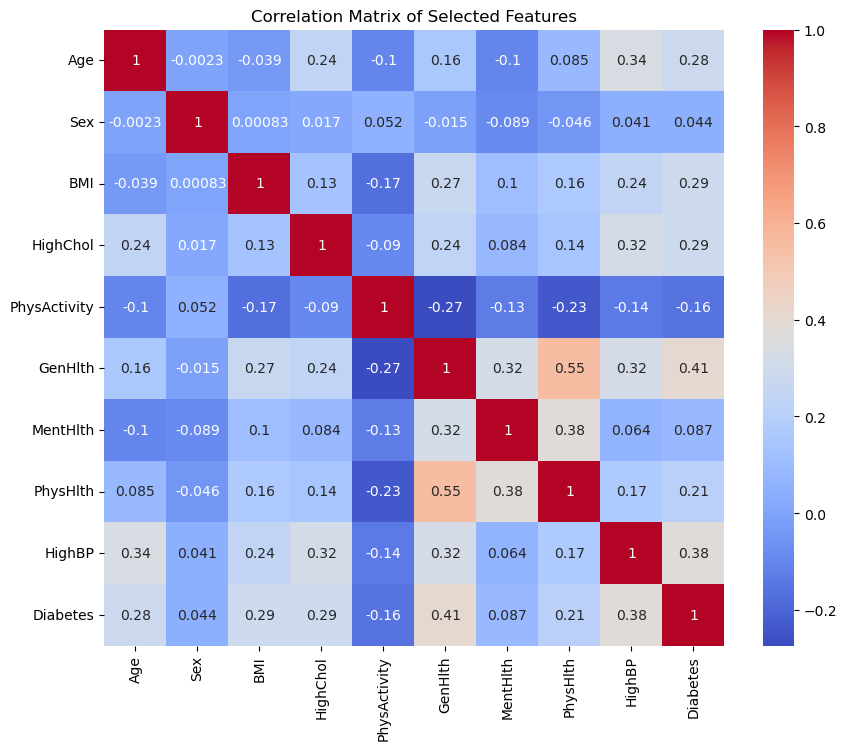

In [2]:
# Check for missing values
missing_values = bigdata_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Visualize the distribution of the dataset features
bigdata_df.hist(bins=30, figsize=(10, 8))
plt.show()

# Visualize the correlation between selected features and target variable (Diabetes_binary)
plt.figure(figsize=(10, 8))
selected_features = ['Age', 'Sex','BMI', 'HighChol', 'PhysActivity', 'GenHlth', 'MentHlth', 'PhysHlth', 'HighBP']
sns.heatmap(bigdata_df[selected_features + ['Diabetes']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()


In [3]:
# Select relevant features (X) and target (y)
X_bigdata = bigdata_df[['Age','Sex','BMI', 'HighChol', 'PhysActivity','GenHlth','MentHlth', 'PhysHlth', 'HighBP']]  # Select the most relevant features
y_bigdata = bigdata_df['Diabetes']  # Target
# Impute missing values with median for continuous variables
imputer = SimpleImputer(strategy='median')
X_bigdata_imputed = imputer.fit_transform(X_bigdata)

# Scale the features to standardize them (mean = 0, variance = 1)
scaler = StandardScaler()
X_bigdata_scaled = scaler.fit_transform(X_bigdata_imputed)

# Display the first 5 rows of the scaled dataset
pd.DataFrame(X_bigdata_scaled, columns=X_bigdata.columns).head()


,Age,Sex,BMI,HighChol,PhysActivity,GenHlth,MentHlth,PhysHlth,HighBP
0,-1.607237,1.090046,-0.542176,-1.052798,0.649925,0.146304,0.153020,2.404008,0.880201
1,1.197681,1.090046,-0.542176,0.949850,-1.538638,0.146304,-0.460058,-0.577451,0.880201
2,1.548296,1.090046,-0.542176,-1.052798,0.649925,-1.649743,-0.460058,0.416369,-1.136104
3,0.847066,1.090046,-0.261036,0.949850,0.649925,0.146304,-0.460058,-0.279305,0.880201
4,-0.204778,-0.917392,-0.120466,-1.052798,0.649925,-0.751719,-0.460058,-0.577451,-1.136104


In [4]:
# Split the data into training (80%) and testing (20%) sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_bigdata_scaled, y_bigdata, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (56553, 9)
X_test shape: (14139, 9)
y_train shape: (56553,)
y_test shape: (14139,)


In [5]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set to balance the minority class (diabetic)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())


Class distribution after SMOTE:
Diabetes
1.0    28297
0.0    28297
Name: count, dtype: int64


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Initialize the Logistic Regression model
# Use 'balanced' class weights to handle potential class imbalance
logistic_regression_model = LogisticRegression(class_weight='balanced', solver='liblinear')

# Set up a hyperparameter grid for tuning (C controls regularization strength)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  # L1 for Lasso, L2 for Ridge regularization
}

# Use GridSearchCV to tune hyperparameters with 5-fold cross-validation
grid_search = GridSearchCV(logistic_regression_model, param_grid, cv=5, scoring='f1', verbose=1)

# Train the model with the best hyperparameters on the SMOTE data
grid_search.fit(X_train_smote, y_train_smote)

# Output the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Re-train the model with the best hyperparameters
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'C': 0.01, 'penalty': 'l1'}


In [7]:
from sklearn.model_selection import cross_val_score

# Evaluate the model using cross-validation on the training data
cv_scores = cross_val_score(best_model, X_train_smote, y_train_smote, cv=5, scoring='f1')

# Output cross-validation results
print(f"Cross-validation F1 scores: {cv_scores}")
print(f"Mean CV F1 Score: {cv_scores.mean()}")


Cross-validation F1 scores: [0.75151619 0.74488121 0.75062754 0.75450548 0.75137646]
Mean CV F1 Score: 0.7505813754150016


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Compute evaluation metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Test Accuracy: {acc}")
print(f"Test Precision: {prec}")
print(f"Test Recall: {rec}")
print(f"Test F1-Score: {f1}")


Test Accuracy: 0.742414597920645
Test Precision: 0.729119031607263
Test Recall: 0.7690452546460491
Test F1-Score: 0.7485501242750622


In [9]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Detailed classification report
report = classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic'])
print("Classification Report:\n", report)


Confusion Matrix:
[[5076 2014]
 [1628 5421]]
Classification Report:
               precision    recall  f1-score   support

Non-Diabetic       0.76      0.72      0.74      7090
    Diabetic       0.73      0.77      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



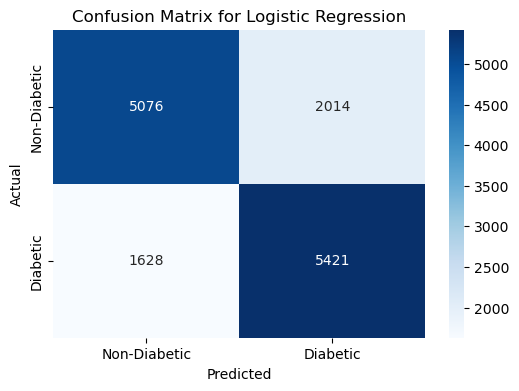

In [10]:
# Visualize the Confusion Matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title("Confusion Matrix for Logistic Regression")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('lr.png')
plt.show()

In [11]:
# Import the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier and rename it as random_forest_model
random_forest_model = RandomForestClassifier(random_state=42)

# Fit the model using the training data
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Predict the test set results
y_pred= random_forest_model.predict(X_test)

In [13]:
from sklearn.model_selection import cross_val_score

# Random Forest Cross-validation
rf_model = RandomForestClassifier()
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Random Forest Cross-validation accuracy: ", rf_cv_scores.mean())


Random Forest Cross-validation accuracy:  0.7111205596986604


In [14]:
# Import metrics functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.709102482495226
Precision: 0.6969412396028978
Recall: 0.7369839693573557
Confusion Matrix:
[[4831 2259]
 [1854 5195]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.68      0.70      7090
         1.0       0.70      0.74      0.72      7049

    accuracy                           0.71     14139
   macro avg       0.71      0.71      0.71     14139
weighted avg       0.71      0.71      0.71     14139



Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.68      0.70      7090
         1.0       0.70      0.74      0.72      7049

    accuracy                           0.71     14139
   macro avg       0.71      0.71      0.71     14139
weighted avg       0.71      0.71      0.71     14139



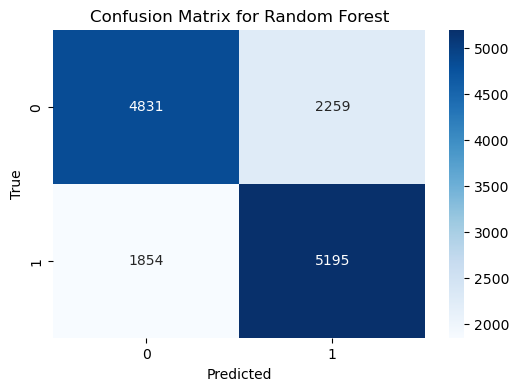

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Generate a detailed classification report
classification_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", classification_report)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('rf.png')
plt.show()

In [16]:
# Import the necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the SVM model
svm_model = SVC(kernel='linear', probability=True)


In [17]:
from sklearn.model_selection import cross_val_score
# Initialize the SVM model (you can change the kernel if needed)
svm_model = SVC(kernel='linear')

# Apply 5-fold cross-validation
cv_scores = cross_val_score(svm_model, X_train , y_train, cv=5)

# Print the cross-validation scores for each fold
print("Cross-Validation Scores:", cv_scores)

# Print the mean cross-validation score
print(f"Mean CV Score: {cv_scores.mean():.2f}")

Cross-Validation Scores: [0.74493856 0.73857307 0.74458492 0.74792219 0.74350133]
Mean CV Score: 0.74


In [18]:
# Fitted the model
svm_model.fit(X_train, y_train)

# Make prediction
y_pred = svm_model.predict(X_test)

In [19]:
# Import metrics functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.7403635334889314
Precision: 0.7175425038639877
Recall: 0.7903248687757128
Confusion Matrix:
[[4897 2193]
 [1478 5571]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73      7090
         1.0       0.72      0.79      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.69      0.73      7090
         1.0       0.72      0.79      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



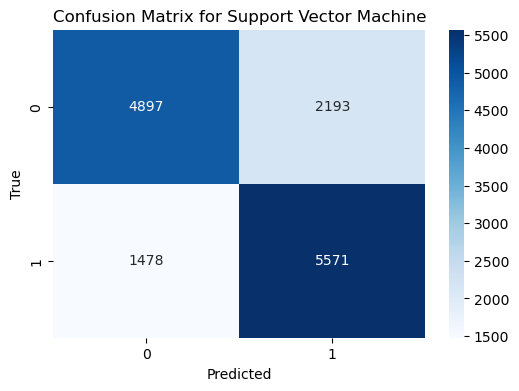

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Generate a detailed classification report
classification_report_bigdata = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", classification_report_bigdata)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Support Vector Machine')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('svm.png')
plt.show()

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model using the predefined training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
# Make predictions using the predefined test data
knn_predictions= knn.predict(X_test)

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define parameter grid for KNN
param_grid = {'n_neighbors': [3, 5, 7, 9], 'metric': ['euclidean', 'manhattan']}

# Set up GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Define best_knn using the best model found by GridSearchCV
best_knn = grid_search.best_estimator_

# Print best parameters
print(f"Best parameters: {grid_search.best_params_}")


Best parameters: {'metric': 'euclidean', 'n_neighbors': 9}


In [24]:
import numpy as np
from sklearn.metrics import precision_recall_curve

# Predict probabilities using the best KNN model
y_proba = best_knn.predict_proba(X_test)[:, 1]

# Compute precision-recall curve and find the best threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
optimal_threshold = thresholds[np.argmax(precision * recall)]
print(f"Optimal threshold: {optimal_threshold}")

# Apply the optimal threshold for classification
knn_predictions_optimized = (y_proba >= optimal_threshold).astype(int)

Optimal threshold: 0.3333333333333333


In [25]:
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation on the training data
cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train, y_train, cv=10, scoring='accuracy')

# Print cross-validation accuracy
print(f"Cross-validation accuracy: {cv_scores.mean()}")

Cross-validation accuracy: 0.7109614259076533


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate evaluation metrics using the test data
knn_accuracy_bigdata = accuracy_score(y_test, knn_predictions)
knn_precision_bigdata = precision_score(y_test, knn_predictions)
knn_recall_bigdata = recall_score(y_test, knn_predictions)
knn_f1_bigdata = f1_score(y_test, knn_predictions)
knn_conf_matrix_bigdata = confusion_matrix(y_test, knn_predictions)

# Output the evaluation results
print(f"Accuracy: {knn_accuracy_bigdata}")
print(f"Precision: {knn_precision_bigdata}")
print(f"Recall: {knn_recall_bigdata}")
print(f"F1-Score: {knn_f1_bigdata}")
print(f"Confusion Matrix:\n{knn_conf_matrix_bigdata}")

Accuracy: 0.7124973477615107
Precision: 0.6997322623828648
Recall: 0.741523620371684
F1-Score: 0.7200220400854054
Confusion Matrix:
[[4847 2243]
 [1822 5227]]


Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      0.68      0.70      7090
         1.0       0.70      0.74      0.72      7049

    accuracy                           0.71     14139
   macro avg       0.71      0.71      0.71     14139
weighted avg       0.71      0.71      0.71     14139



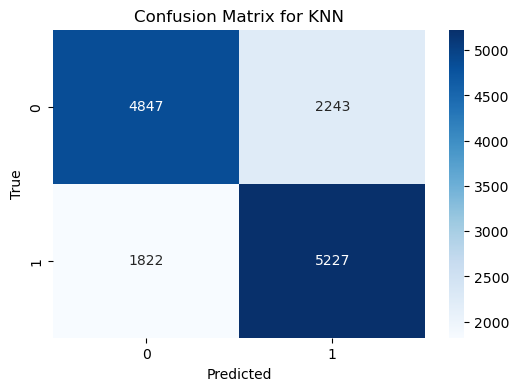

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Generate a detailed classification report
classification_report= classification_report(y_test, knn_predictions)

# Print the classification report
print("Classification Report:\n", classification_report)


# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(knn_conf_matrix_bigdata, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('knn.png')
plt.show()

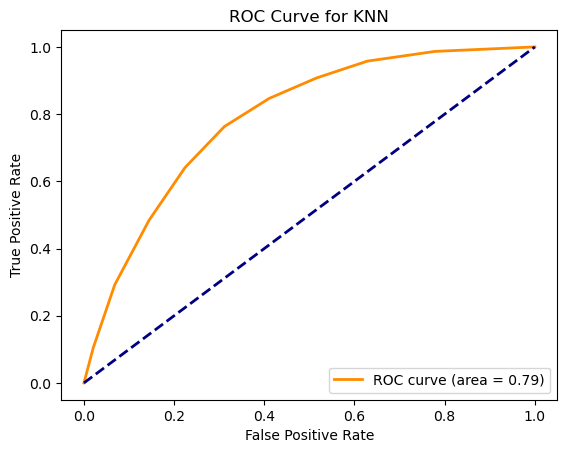

In [28]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for the best KNN model
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc='lower right')
plt.show()

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Initialize the Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier()

# Train the model
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [30]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, verbose=2)

# Train the model with the best parameters
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found:", grid_search.best_params_)

# Make predictions using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the best model
print(f"Best Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.2s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.2s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.5s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.4s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   4.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

In [31]:
# Make predictions on the test set
y_pred = gbc_model.predict(X_test)

In [32]:
# Import metrics functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.7486385175755004
Precision: 0.7265068049254698
Recall: 0.7951482479784366
Confusion Matrix:
[[4980 2110]
 [1444 5605]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74      7090
         1.0       0.73      0.80      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.70      0.74      7090
         1.0       0.73      0.80      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



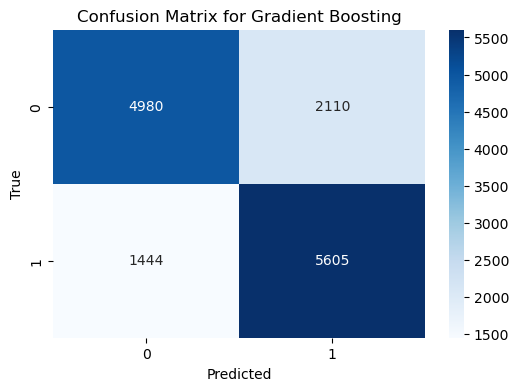

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Generate a detailed classification report
classification_report_bigdata = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", classification_report_bigdata)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('gb.png')
plt.show()

In [34]:
# Import the necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

GaussianNB()

In [35]:
from sklearn.model_selection import cross_val_score
# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Apply 5-fold cross-validation
cv_scores = cross_val_score(nb_model, X_bigdata_scaled, y_bigdata, cv=5)

# Print the cross-validation scores for each fold
print("Cross-Validation Scores:", cv_scores)

# Print the mean cross-validation score
print(f"Mean CV Score: {cv_scores.mean():.2f}")

Cross-Validation Scores: [0.71030483 0.73166419 0.7104258  0.72421842 0.72344037]
Mean CV Score: 0.72


In [36]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid (Naive Bayes has fewer parameters; one you can tune is 'var_smoothing')
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7]}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, verbose=2)

# Fit the model
grid_search.fit(X_bigdata_scaled, y_bigdata)

# Output the best parameters
print("Best Parameters:", grid_search.best_params_)

# Output the best cross-validation score
print(f"Best Cross-Validation Score: {grid_search.best_score_:.2f}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-07; total time=   0.0s
[CV] END ................................var_smoo

In [37]:
# Fit the model on the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_model.predict(X_test)

In [38]:
# Import metrics functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Use the trained model (grid_search) to predict on the test set
y_pred = grid_search.predict(X_test)  # Replace X_test if the test dataset name is different

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.721903953603508
Precision: 0.7303088517807005
Recall: 0.7010923535253227
Confusion Matrix:
[[5265 1825]
 [2107 4942]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.74      0.73      7090
         1.0       0.73      0.70      0.72      7049

    accuracy                           0.72     14139
   macro avg       0.72      0.72      0.72     14139
weighted avg       0.72      0.72      0.72     14139



Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.74      0.73      7090
         1.0       0.73      0.70      0.72      7049

    accuracy                           0.72     14139
   macro avg       0.72      0.72      0.72     14139
weighted avg       0.72      0.72      0.72     14139



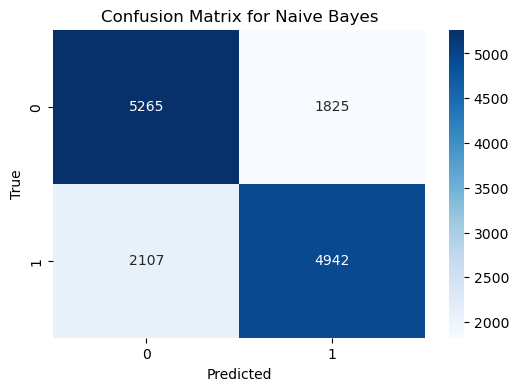

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Generate a detailed classification report
classification_report_bigdata = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", classification_report_bigdata)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')

# Save the plot to an image file
plt.savefig('nb.png')

# Now show the plot
plt.show()

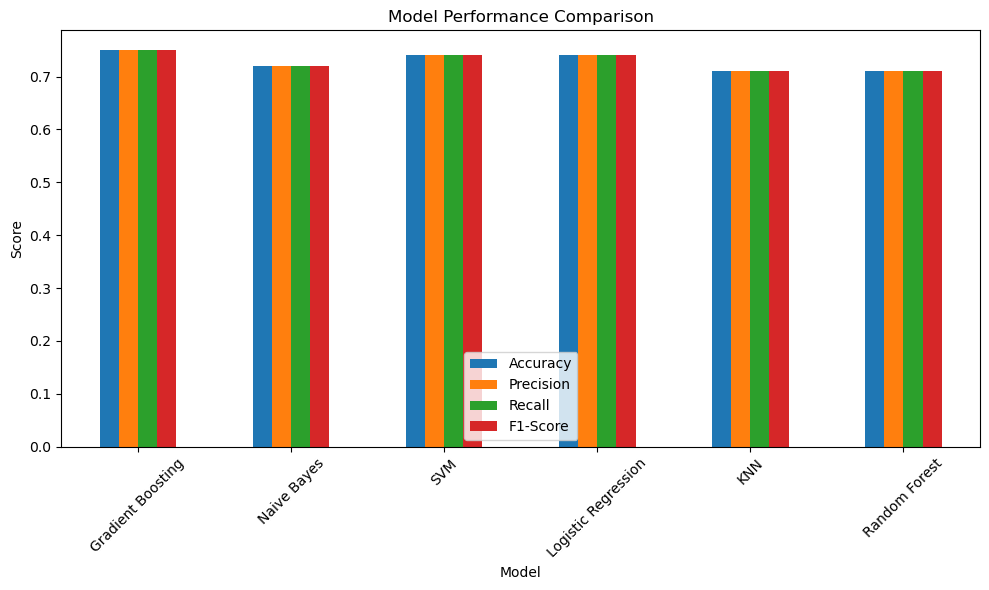

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example performance metrics
models = ['Gradient Boosting', 'Naive Bayes', 'SVM', 'Logistic Regression', 'KNN', 'Random Forest']
accuracy = [0.75, 0.72, 0.74, 0.74, 0.71, 0.71]
precision = [0.75, 0.72, 0.74, 0.74, 0.71, 0.71]
recall = [0.75, 0.72, 0.74, 0.74, 0.71, 0.71]
f1_score = [0.75, 0.72, 0.74, 0.74, 0.71, 0.71]

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
df_metrics = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score
})
df_metrics.set_index('Model', inplace=True)

df_metrics.plot(kind='bar', ax=ax)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


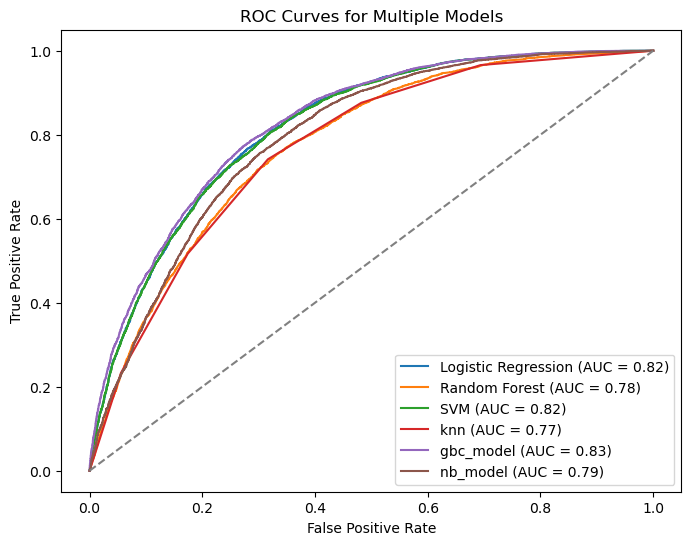

Logistic Regression AUC: 0.82
Random Forest AUC: 0.78
SVM AUC: 0.82
knn AUC: 0.77
gbc_model AUC: 0.83
nb_model AUC: 0.79


In [41]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

roc_auc_results = {}

models = {
    'Logistic Regression': best_model, 
    'Random Forest': random_forest_model,  
    'SVM': svm_model,  
    'knn': knn,
    'gbc_model' : gbc_model,
    'nb_model' : nb_model,
}

# Plot ROC curve for each model
plt.figure(figsize=(8, 6))

for model_name, model in models.items():
    # Predict probabilities for the positive class
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    
    # Calculate AUC
    auc_score = roc_auc_score(y_test, y_pred_proba)
    roc_auc_results[model_name] = auc_score

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

# Plot the diagonal line for random chance
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiple Models')
plt.legend(loc='lower right')

# Save the plot to an image file
plt.savefig('roc_curve.png')

# Show the plot in the notebook
plt.show()

# Display AUC scores for each model
for model_name, auc_score in roc_auc_results.items():
    print(f'{model_name} AUC: {auc_score:.2f}')


In [42]:
import pickle

# Assume the models, imputer, and scaler have already been trained and initialized earlier
diabetes_models = {
    "models": {
        "logreg": best_model,              # Your Logistic Regression model
        "random_forest": random_forest_model,  # Your Random Forest model
        "svm_model": svm_model,            # Your SVM model
        "knn": knn,                        # Your K-Nearest Neighbors model
        "gbc_model": gbc_model,            # Your Gradient Boosting model
        "nb_model": nb_model               # Your Naive Bayes model
    },
    "imputer": imputer,                    # Your imputer
    "scaler": scaler                       # Your scaler
}

# Save the models, imputer, and scaler into a file
with open('diabetes_models.pkl', 'wb') as file:
    pickle.dump(diabetes_models, file)

print("Model and preprocessing steps saved to 'diabetes_models.pkl'")

# Load the trained models, imputer, and scaler from the pickle file
with open('diabetes_models.pkl', 'rb') as file:
    models_data = pickle.load(file)

# Extract models, imputer, and scaler from the loaded dictionary
models = models_data["models"]
imputer = models_data["imputer"]
scaler = models_data["scaler"]

print("Models, imputer, and scaler loaded successfully.")

Model and preprocessing steps saved to 'diabetes_models.pkl'
Models, imputer, and scaler loaded successfully.
